In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [48]:
# Example filenames (update based on actual names)
covid_df = pd.read_csv("covid19_Confirmed_dataset.csv")
happiness_df = pd.read_csv("worldwide_happiness_report.csv")
death_df=pd.read_csv("covid19_deaths_dataset.csv")


In [49]:
covid_df.head()
happiness_df.head()


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [50]:
covid_df.isnull().sum()
happiness_df.isnull().sum()


Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [51]:
#covid_df.groupby("Date")["Confirmed"].sum().plot(title="Total Confirmed Cases Over Time", figsize=(10, 5))
#plt.show()


In [52]:
covid_df.dropna(inplace=True)
happiness_df.dropna(inplace=True)


In [53]:
happiness_df.rename(columns={"Country name": "Country"}, inplace=True)



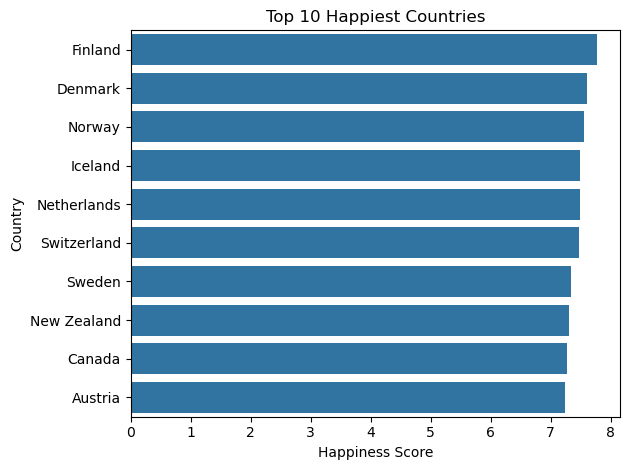

In [54]:
top_happy = happiness_df.sort_values(by="Score", ascending=False).head(10)

sns.barplot(x="Score", y="Country or region", data=top_happy)
plt.title("Top 10 Happiest Countries")
plt.xlabel("Happiness Score")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



In [55]:
# Sum across all dates to get total confirmed cases per country
covid_df["TotalConfirmed"] = covid_df.iloc[:, 4:].sum(axis=1)

# Now group by country
covid_country = covid_df.groupby("Country/Region")["TotalConfirmed"].sum().reset_index()

# Sort and display top 10
covid_country = covid_country.sort_values(by="TotalConfirmed", ascending=False).head(10)
print(covid_country)
# Sum across all dates to get total confirmed cases per country
covid_df["TotalConfirmed"] = covid_df.iloc[:, 4:].sum(axis=1)



   Country/Region  TotalConfirmed
2           China         6686938
1          Canada          982149
0       Australia          224354
4          France           39481
6  United Kingdom           30354
3         Denmark            7755
5     Netherlands            5228


In [56]:
# Step 1: Calculate total confirmed cases per country
covid_df["TotalConfirmed"] = covid_df.iloc[:, 4:].sum(axis=1)

# Step 2: Group by Country/Region
covid_country = covid_df.groupby("Country/Region")["TotalConfirmed"].sum().reset_index()
covid_country.columns = ["Country", "TotalConfirmed"]  # Rename for merge compatibility



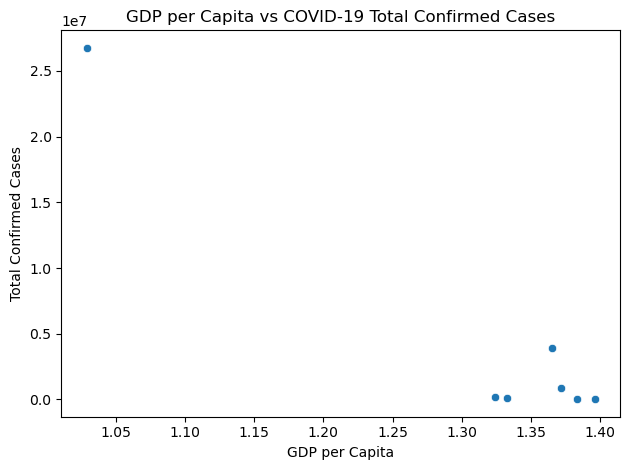

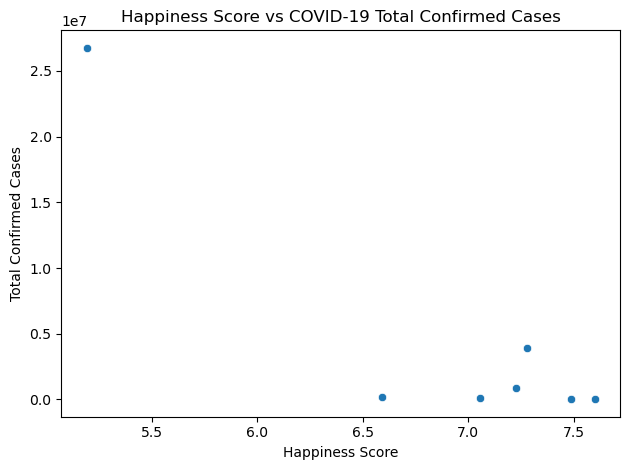

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Load the COVID-19 data (if not already loaded)
# covid_df = pd.read_csv("covid_data.csv")  # Replace with your actual filename

# 🔹 Create TotalConfirmed column by summing across all date columns
covid_df["TotalConfirmed"] = covid_df.iloc[:, 4:].sum(axis=1)

# 🔹 Group by Country
covid_country = covid_df.groupby("Country/Region")["TotalConfirmed"].sum().reset_index()
covid_country.columns = ["Country", "TotalConfirmed"]

# 🔹 Prepare happiness data
# happiness_df = pd.read_csv("happiness_data.csv")  # Replace with your actual filename
happiness_df = happiness_df.rename(columns={"Country or region": "Country"})

# 🔹 Merge both datasets on 'Country'
merged_df = pd.merge(happiness_df, covid_country, on="Country")

# ✅ Plot 1: GDP per Capita vs Total Confirmed Cases
sns.scatterplot(x="GDP per capita", y="TotalConfirmed", data=merged_df)
plt.title("GDP per Capita vs COVID-19 Total Confirmed Cases")
plt.xlabel("GDP per Capita")
plt.ylabel("Total Confirmed Cases")
plt.tight_layout()
plt.show()

# ✅ Plot 2: Happiness Score vs Total Confirmed Cases
sns.scatterplot(x="Score", y="TotalConfirmed", data=merged_df)
plt.title("Happiness Score vs COVID-19 Total Confirmed Cases")
plt.xlabel("Happiness Score")
plt.ylabel("Total Confirmed Cases")
plt.tight_layout()
plt.show()


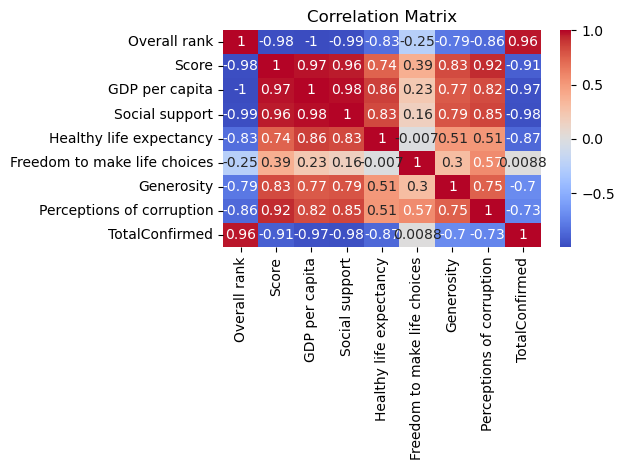

In [58]:
# Select only numeric columns
numeric_df = merged_df.select_dtypes(include=['number'])

# Plot correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

